In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model
import statsmodels.api as sm

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [5]:
df = pd.read_fwf("brain_body.txt")

In [6]:
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


<AxesSubplot:xlabel='Brain', ylabel='Body'>

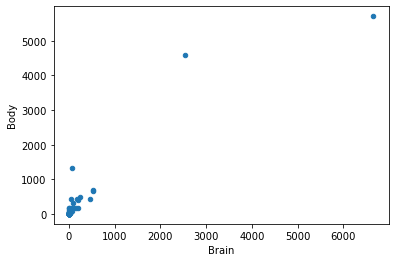

In [14]:
df.plot.scatter(x = "Brain", y = "Body")

In [17]:
X=df['Brain'].values
Y=df['Body'].values

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=1/3, random_state=0)

In [20]:
from sklearn.linear_model import LinearRegression


In [21]:
lr=LinearRegression()
lr

LinearRegression()

In [22]:
lr.fit(X_train.reshape(-1,1),y_train)

LinearRegression()

In [23]:
y_pred=lr.predict(X_test.reshape(-1,1))


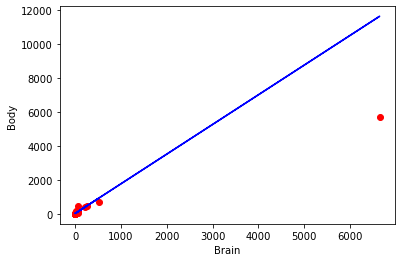

In [24]:
plt.scatter(X_test.reshape(-1,1),y_test,color='r')
plt.plot(X_test.reshape(-1,1),lr.predict(X_test.reshape(-1,1)), color='b')
plt.xlabel("Brain")
plt.ylabel("Body")
plt.show()

In [25]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 340.9495491055952
Mean Squared Error: 1689668.0157565135
Root Mean Squared Error: 1299.8723074812053


# R2

In [26]:
lr.score(X_train.reshape(-1,1), y_train)

0.9184607902660491

In [27]:
print('Train Score: ', lr.score(X_train.reshape(-1,1), y_train))  
print('Test Score: ', lr.score(X_test.reshape(-1,1), y_test))

Train Score:  0.9184607902660491
Test Score:  -0.16806680839158705


In [30]:
lr = sm.OLS(y_train,sm.add_constant(X_train))

model_results = lr.fit()

model_results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     439.3
Date:                Sun, 14 Nov 2021   Prob (F-statistic):           7.81e-23
Time:                        11:34:23   Log-Likelihood:                -277.21
No. Observations:                  41   AIC:                             558.4
Df Residuals:                      39   BIC:                             561.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.6035     34.652      0.970      0.338     -36.486     103.693
x1             1.7459      0.083     20.959      0.000       1.577       1.914
==============================================================================
Omnibus:                       70.861   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              953.806
Skew:                           4.096   Prob(JB):                    7.65e-208
Kurtosis:                      25.163   Cond. No.                         431.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""